<a href="https://colab.research.google.com/github/Mahesharvinds/DataAnalyticsCourseWork/blob/master/Introduction_to_Text_Analytics_NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import PunktSentenceTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Getting started with Text Analytics using NLTK

### Text for Analysis

In [16]:
paragraph = "Mariam’s Tomb Sikandra might not be as large or as grand as the surrounding examples but it has a subdued pride about it, a humbleness. It has a relaxed atmosphere as it attracts far fewer visitors than its neighbours so makes a nice change of pace and allows for some quiet reflection.Very beautiful"
print(paragraph)

Mariam’s Tomb Sikandra might not be as large or as grand as the surrounding examples but it has a subdued pride about it, a humbleness. It has a relaxed atmosphere as it attracts far fewer visitors than its neighbours so makes a nice change of pace and allows for some quiet reflection.Very beautiful


### Tokenizing the Paragraphs into Sentences 

In [25]:
#nltk.download("punkt") - Use in case Punkt Not Found
sentences = sent_tokenize(paragraph)
print(sentences)

['Mariam’s Tomb Sikandra might not be as large or as grand as the surrounding examples but it has a subdued pride about it, a humbleness.', 'It has a relaxed atmosphere as it attracts far fewer visitors than its neighbours so makes a nice change of pace and allows for some quiet reflection.Very beautiful']


### Tokenizing the Sentences into Words 

In [18]:
for i in sentences:
    print(word_tokenize(i))
    print("\n")

['Mariam', '’', 's', 'Tomb', 'Sikandra', 'might', 'not', 'be', 'as', 'large', 'or', 'as', 'grand', 'as', 'the', 'surrounding', 'examples', 'but', 'it', 'has', 'a', 'subdued', 'pride', 'about', 'it', ',', 'a', 'humbleness', '.']


['It', 'has', 'a', 'relaxed', 'atmosphere', 'as', 'it', 'attracts', 'far', 'fewer', 'visitors', 'than', 'its', 'neighbours', 'so', 'makes', 'a', 'nice', 'change', 'of', 'pace', 'and', 'allows', 'for', 'some', 'quiet', 'reflection.Very', 'beautiful']




### Parts of Speech Tagging of Words in the Sentences

In [21]:
for i in sentences:
    print(pos_tag(word_tokenize(i)))
    print("\n")

[('Mariam', 'NNP'), ('’', 'NNP'), ('s', 'VBD'), ('Tomb', 'NNP'), ('Sikandra', 'NNP'), ('might', 'MD'), ('not', 'RB'), ('be', 'VB'), ('as', 'IN'), ('large', 'JJ'), ('or', 'CC'), ('as', 'RB'), ('grand', 'JJ'), ('as', 'IN'), ('the', 'DT'), ('surrounding', 'VBG'), ('examples', 'NNS'), ('but', 'CC'), ('it', 'PRP'), ('has', 'VBZ'), ('a', 'DT'), ('subdued', 'VBN'), ('pride', 'NN'), ('about', 'IN'), ('it', 'PRP'), (',', ','), ('a', 'DT'), ('humbleness', 'NN'), ('.', '.')]


[('It', 'PRP'), ('has', 'VBZ'), ('a', 'DT'), ('relaxed', 'NN'), ('atmosphere', 'RB'), ('as', 'IN'), ('it', 'PRP'), ('attracts', 'VBZ'), ('far', 'RB'), ('fewer', 'JJR'), ('visitors', 'NNS'), ('than', 'IN'), ('its', 'PRP$'), ('neighbours', 'NNS'), ('so', 'RB'), ('makes', 'VBZ'), ('a', 'DT'), ('nice', 'JJ'), ('change', 'NN'), ('of', 'IN'), ('pace', 'NN'), ('and', 'CC'), ('allows', 'VBZ'), ('for', 'IN'), ('some', 'DT'), ('quiet', 'JJ'), ('reflection.Very', 'NN'), ('beautiful', 'NN')]




### Loading English Stop Words Corpus

In [0]:
#nltk.download('stopwords') - Use in case stop words not found
stopWords = set(stopwords.words('english'))

### Removal of Stop Words

In [0]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(paragraph)

In [28]:
wordsFiltered = []
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)
print(wordsFiltered)

['Mariam', 'Tomb', 'Sikandra', 'might', 'large', 'grand', 'surrounding', 'examples', 'subdued', 'pride', 'humbleness', 'It', 'relaxed', 'atmosphere', 'attracts', 'far', 'fewer', 'visitors', 'neighbours', 'makes', 'nice', 'change', 'pace', 'allows', 'quiet', 'reflection', 'Very', 'beautiful']


### Stemming the words to it's root

In [29]:
ps = PorterStemmer()
stemmedWords = []
for word in wordsFiltered:
    stemmedWords.append(ps.stem(word))
print(stemmedWords)

['mariam', 'tomb', 'sikandra', 'might', 'larg', 'grand', 'surround', 'exampl', 'subdu', 'pride', 'humbl', 'It', 'relax', 'atmospher', 'attract', 'far', 'fewer', 'visitor', 'neighbour', 'make', 'nice', 'chang', 'pace', 'allow', 'quiet', 'reflect', 'veri', 'beauti']


### Lemmatization

In [0]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()

In [33]:
#nltk.download('wordnet') - Use in case wordnet not found
lemWords = []
for word in wordsFiltered:
    lemWords.append(lm.lemmatize(word))
print(lemWords)

['Mariam', 'Tomb', 'Sikandra', 'might', 'large', 'grand', 'surrounding', 'example', 'subdued', 'pride', 'humbleness', 'It', 'relaxed', 'atmosphere', 'attracts', 'far', 'fewer', 'visitor', 'neighbour', 'make', 'nice', 'change', 'pace', 'allows', 'quiet', 'reflection', 'Very', 'beautiful']


### Loading the Trip Advisor Review Data of "Mariam's Tomb" Tourist Place

In [0]:
reviews = pd.read_csv("Mariam_Tomb.csv")

In [0]:
reviews = reviews["Review"]

### Text Preprocessing

In [0]:
wordsFiltered = []
for i in reviews:
    words = tokenizer.tokenize(i)
    for w in words:
        if w not in stopWords:
            wordsFiltered.append(w)
lemWords = []
for word in wordsFiltered:
    lemWords.append(lm.lemmatize(word))

### TF-IDF Vectorization

In [37]:
tv = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2),sublinear_tf=True,max_features=100)
tv_features = tv.fit_transform(lemWords)
Features = tv.get_feature_names()
print(Features)

['agra', 'akbar', 'also', 'architectural', 'architecture', 'area', 'away', 'bai', 'beautiful', 'begum', 'building', 'built', 'buried', 'christian', 'complex', 'design', 'emperor', 'garden', 'give', 'go', 'good', 'got', 'grave', 'great', 'ground', 'guide', 'hindu', 'historical', 'history', 'important', 'information', 'inside', 'it', 'its', 'jahangir', 'jodha', 'know', 'lady', 'lie', 'like', 'located', 'lot', 'mahal', 'maintained', 'make', 'many', 'mariam', 'memory', 'monument', 'mother', 'much', 'mughal', 'name', 'near', 'nice', 'nothing', 'one', 'pay', 'people', 'photography', 'place', 'probably', 'queen', 'quiet', 'quite', 'red', 'resting', 'road', 'salim', 'see', 'self', 'side', 'sikandara', 'sikandra', 'still', 'stone', 'story', 'structure', 'style', 'styled', 'taj', 'take', 'the', 'there', 'thing', 'this', 'ticket', 'time', 'tomb', 'tourist', 'uz', 'very', 'visit', 'we', 'well', 'wife', 'worth', 'would', 'you', 'zamani']


### Word Cloud Generation

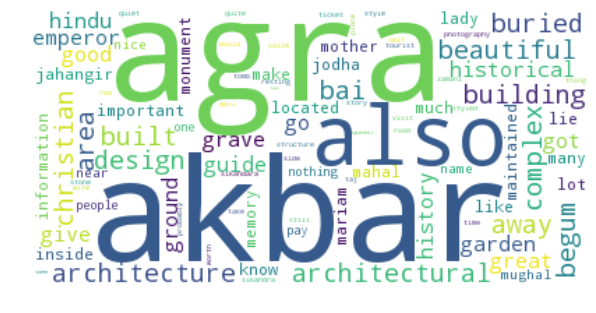

In [38]:
text = ""
for i in Features:
     text = text + i + " "
wc = WordCloud(stopwords=stopWords, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()